# Supervised Learning
## Part 1 of 2

In [ ]:
# run to set up Google Colab Environment
!pip install pycaret

In [2]:
# display interactive visuals
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

from pycaret.regression import *

## Forecast Data As Baseline Model

In [4]:
# ensure data file is in colab directory before running this cell
df = pd.read_csv('forecast_data_v1.csv')

In [5]:
# we will not be using time dependancy for supervised learning
data = df.drop(['Datetime'], axis=1).copy()

In [6]:
data

,Hourly Energy Cons (kWh),Energy Demand (kW),Outside Air Temp (C)
0,15.0,16.0,14.6
1,15.0,16.0,13.6
2,10.0,16.0,13.6
3,15.0,16.0,12.6
4,15.0,16.0,12.6
...,...,...,...
8754,10.0,14.0,23.0
8755,15.0,14.0,24.0
8756,15.0,27.0,22.0
8757,25.0,30.0,21.0


PyCaret Model Selection

In [7]:
exp = setup(data = data, target = 'Hourly Energy Cons (kWh)')

,Description,Value
0,session_id,8507
1,Target,Hourly Energy Cons (kWh)
2,Original Data,"(8759, 3)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6131, 2)"


In [8]:
# train models available in pycaret
# to view list ordered by best performing
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.8769,15.9175,3.9834,0.9010,0.1891,0.1419,0.175
lightgbm,Light Gradient Boosting Machine,2.8976,16.0892,4.0047,0.9000,0.1893,0.1428,0.116
lasso,Lasso Regression,3.0137,17.7843,4.2143,0.8892,0.1975,0.1467,0.018
ridge,Ridge Regression,3.0147,17.7834,4.2142,0.8892,0.1974,0.1467,0.014
en,Elastic Net,3.0138,17.7839,4.2143,0.8892,0.1975,0.1467,0.019
lar,Least Angle Regression,3.0147,17.7834,4.2142,0.8892,0.1974,0.1467,0.016
omp,Orthogonal Matching Pursuit,3.0156,17.7782,4.2136,0.8892,0.1975,0.1468,0.014
br,Bayesian Ridge,3.0147,17.7834,4.2142,0.8892,0.1974,0.1467,0.015
lr,Linear Regression,3.0147,17.7834,4.2142,0.8892,0.1974,0.1467,0.317
huber,Huber Regressor,3.0102,17.8449,4.2215,0.8888,0.1976,0.1470,0.038


In [9]:
# create gradient boost model (top performer)
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.1557,18.8098,4.3370,0.8903,0.1904,0.1531
1,2.8059,15.9789,3.9974,0.9001,0.2068,0.1402
2,2.8398,14.5298,3.8118,0.9134,0.2007,0.1381
3,2.8347,14.7915,3.8460,0.8984,0.1745,0.1418
4,2.6956,12.9308,3.5959,0.9162,0.1675,0.1376
5,2.8618,15.1767,3.8957,0.9026,0.2004,0.1371
6,2.8063,14.5960,3.8205,0.9002,0.1701,0.1404
7,2.9249,18.5209,4.3036,0.8930,0.1900,0.1474
8,2.9111,16.3295,4.0410,0.9000,0.2069,0.1382
9,2.9328,17.5113,4.1847,0.8962,0.1841,0.1449


In [10]:
# tuning model decreases performance, R2 score decreases by 0.0002 (Mean value difference)
# this changes with each run (random initialization), but overall tuning does not provide value in this case
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.1748,19.0693,4.3668,0.8888,0.1910,0.1538
1,2.8874,16.5184,4.0643,0.8968,0.2084,0.1434
2,2.8414,14.4616,3.8028,0.9138,0.2011,0.1381
3,2.8481,14.8835,3.8579,0.8978,0.1744,0.1418
4,2.7153,13.1728,3.6294,0.9147,0.1699,0.1396
5,2.8497,15.0528,3.8798,0.9034,0.2006,0.1370
6,2.8543,14.8139,3.8489,0.8987,0.1711,0.1416
7,2.9344,18.0638,4.2502,0.8957,0.1879,0.1470
8,2.8886,16.1040,4.0130,0.9014,0.2064,0.1380
9,2.9093,17.4434,4.1765,0.8966,0.1832,0.1446


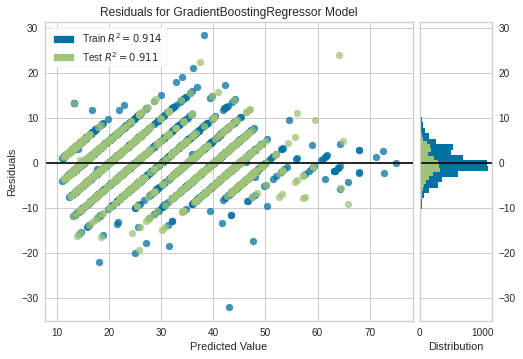

In [11]:
# plot residuals
plot_model(tuned_gbr)

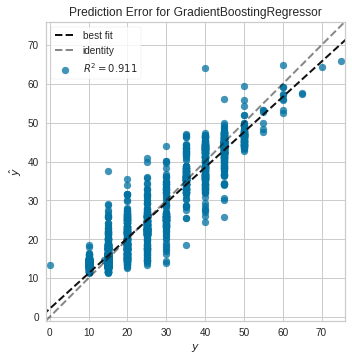

In [12]:
# plot prediction error
plot_model(tuned_gbr, plot = 'error')

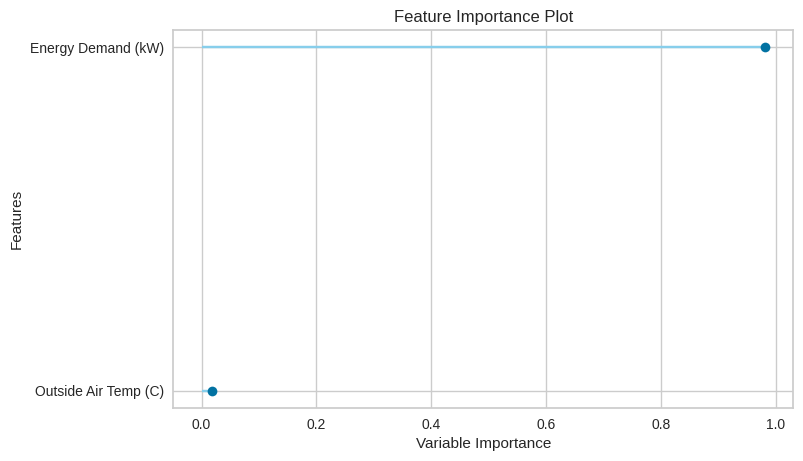

In [13]:
# plot feature importance
plot_model(tuned_gbr, plot='feature')

In [14]:
# interactive plot for all options
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Takeways from these plots:


*   Demand is a much better predictor than temperature, which is not suprising.

*   Looks like this model is overfitting: better training score than test with a flat validation curve

It is still showing quite good performance, and this is just a baseline test to compare the same data from forecasting in the supervised learning scenario. This could be due to demand being included (which is likely), but it will not be used for modeling after this point.
